# Signal Representation

In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import scipy.signal
import scipy.io.wavfile

from sklearn.decomposition import NMF

## 1 - Short time Fourier transform

### 1.1 - Signal interpretation

/home/soubi/.conda/envs/map572/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


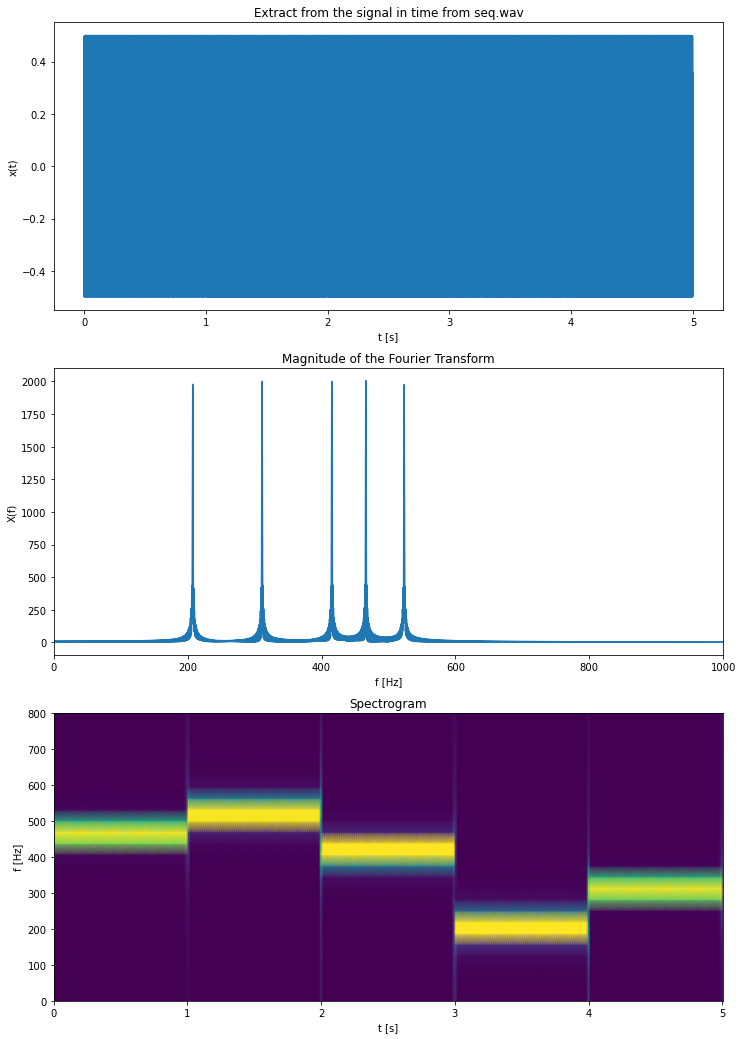

In [75]:
fs,x = sp.io.wavfile.read('seq.wav')

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs

fspec,tspec,z = sp.signal.stft(x, fs, nperseg=256)
z.astype(int)


pl.figure(figsize=[12, 18])
pl.subplot(3,1,1)
pl.title('Extract from the signal in time from seq.wav')
pl.plot(t, x)
pl.xlabel('t [s]')
pl.ylabel('x(t)')
pl.subplot(3,1,2)
pl.title('Magnitude of the Fourier Transform')
pl.plot(f, np.abs(y))
pl.xlabel('f [Hz]')
pl.ylabel('X(f)')
pl.xlim([0,1000])
pl.subplot(3,1,3)
pl.title('Spectrogram')
vmax = np.quantile(np.real(z.reshape(-1)), .998)
pl.pcolormesh(tspec, fspec, np.abs(z), shading='gouraud', vmax=vmax)
pl.ylim([0,800])
pl.xlabel('t [s]')
pl.ylabel('f [Hz]')
pl.show()

We can distinctly recognize the different notes played and their duration.

/home/soubi/.conda/envs/map572/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


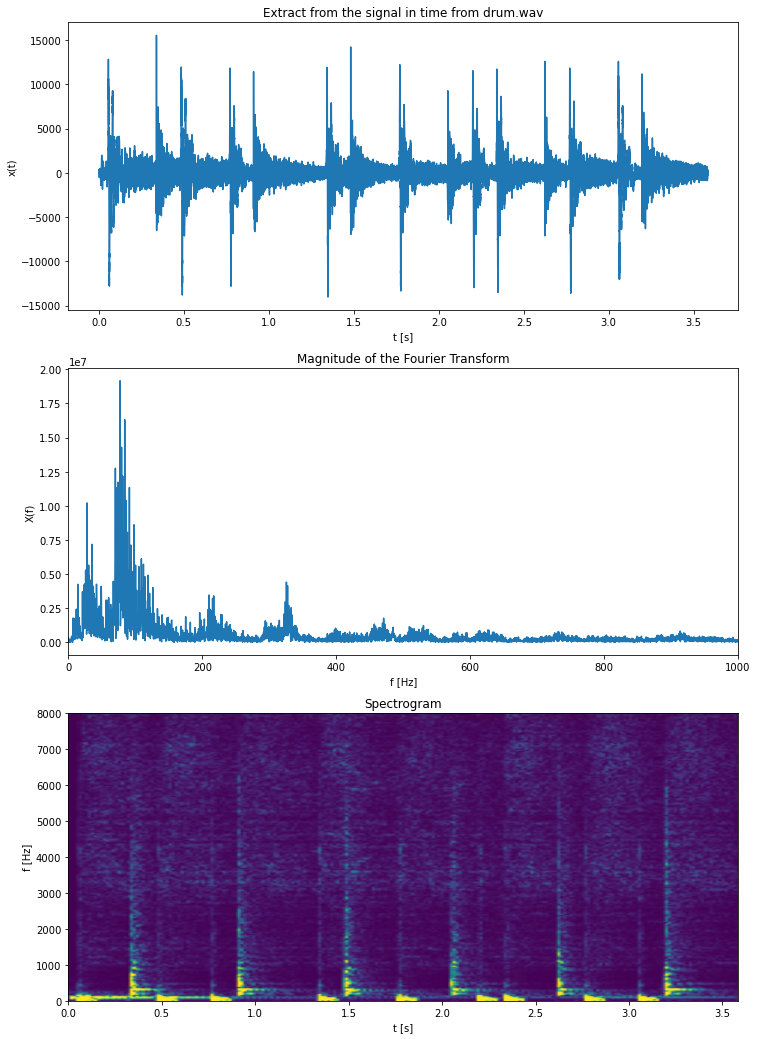

In [55]:
fs,x = sp.io.wavfile.read('drum.wav')

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs

fspec,tspec,z = sp.signal.stft(x, fs, nperseg=512)
z.astype(int)


pl.figure(figsize=[12, 18])
pl.subplot(3,1,1)
pl.title('Extract from the signal in time from drum.wav')
pl.plot(t, x)
pl.xlabel('t [s]')
pl.ylabel('x(t)')
pl.subplot(3,1,2)
pl.title('Magnitude of the Fourier Transform')
pl.plot(f, np.abs(y))
pl.xlabel('f [Hz]')
pl.ylabel('X(f)')
pl.xlim([0,1000])
pl.subplot(3,1,3)
pl.title('Spectrogram')
vmax = np.quantile(np.real(z.reshape(-1)), .998)
pl.pcolormesh(tspec, fspec, np.abs(z), shading='gouraud', vmax=vmax)
pl.ylim([0,8000])
pl.xlabel('t [s]')
pl.ylabel('f [Hz]')
pl.show()

We can distinct the three parts : the snare, at approximatively 300Hz played regularly every offbeat; the kick, at the lowest frequencies with a less regular and bouncier rythm; and the cymbals with a lot of harmonies that makes it look like cloudy on the spectogram, wih frequencies higher than 3000Hz, played at the same times than the kick.

/home/soubi/.conda/envs/map572/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


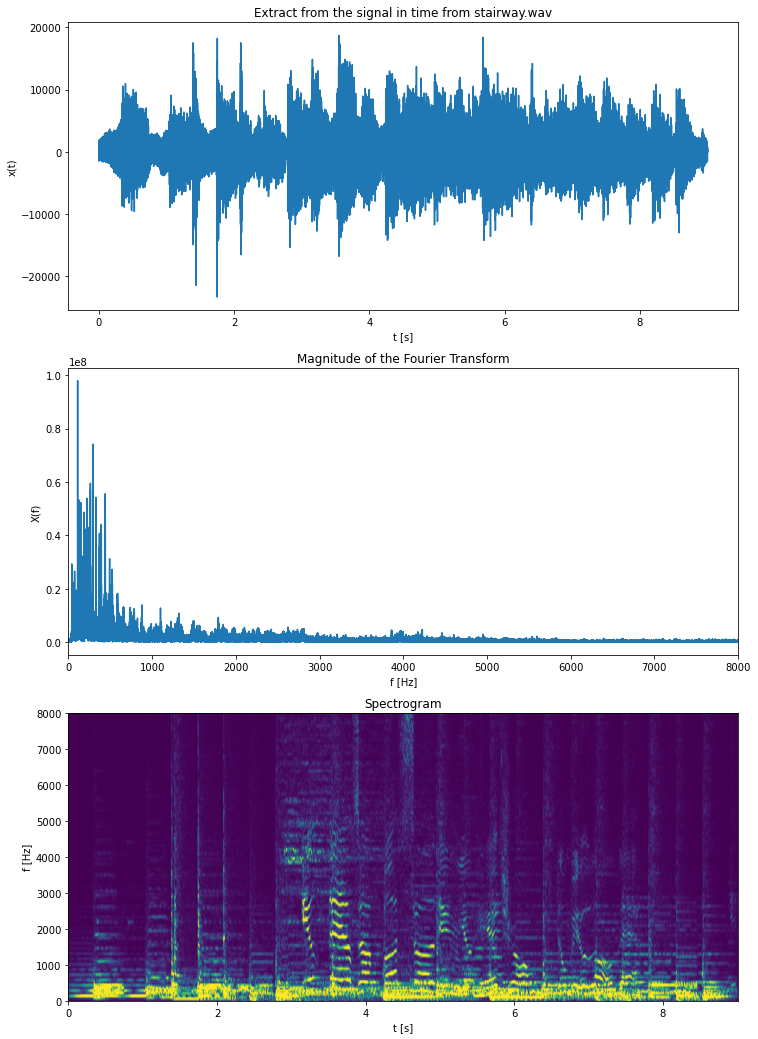

In [74]:
fs,x = sp.io.wavfile.read('stairway.wav')

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs

fspec,tspec,z = sp.signal.stft(x, fs, nperseg=1024)
z.astype(int)


pl.figure(figsize=[12, 18])
pl.subplot(3,1,1)
pl.title('Extract from the signal in time from stairway.wav')
pl.plot(t, x)
pl.xlabel('t [s]')
pl.ylabel('x(t)')
pl.subplot(3,1,2)
pl.title('Magnitude of the Fourier Transform')
pl.plot(f, np.abs(y))
pl.xlabel('f [Hz]')
pl.ylabel('X(f)')
pl.xlim([0,8000])
pl.subplot(3,1,3)
pl.title('Spectrogram')
vmax = np.quantile(np.real(z.reshape(-1)), .998)
pl.pcolormesh(tspec, fspec, np.abs(z), shading='gouraud', vmax=vmax)
pl.ylim([0,8000])
pl.xlabel('t [s]')
pl.ylabel('f [Hz]')
pl.show()

The vertical lines represent the beat, the horizontal straight lines represent the notes played by the guitar and the bass and their harmonies, whereas the wavy horizontal lines are the notes sung and their harmonies, because singing make more use of tremolos and bends than the guitar play (but wavy lines can be caused by a bend, a slide  or a vibrato on a guitar or bass guitar).

In [73]:
fs,x = sp.io.wavfile.read('stairwayb.wav')

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs

fspec,tspec,z = sp.signal.stft(x, fs, nperseg=1024)
z.astype(int)


pl.figure(figsize=[12, 18])
pl.subplot(3,1,1)
pl.title('Extract from the signal in time from stairwayb.wav')
pl.plot(t, x)
pl.xlabel('t [s]')
pl.ylabel('x(t)')
pl.subplot(3,1,2)
pl.title('Magnitude of the Fourier Transform')
pl.plot(f, np.abs(y))
pl.xlabel('f [Hz]')
pl.ylabel('X(f)')
pl.xlim([0,8000])
pl.subplot(3,1,3)
pl.title('Spectrogram')
vmax = np.quantile(np.real(z.reshape(-1)), .998)
pl.pcolormesh(tspec, fspec, np.abs(z), shading='gouraud', vmax=vmax)
pl.ylim([0,8000])
pl.xlabel('t [s]')
pl.ylabel('f [Hz]')
pl.show()

/home/soubi/.conda/envs/map572/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


The part of the spectrogram where $f<4000Hz$ seems to be exactly the same as in stairway.wav . However the other half is completely noisy and indecipherable. Some harmonies of the original song completely disappeared on this spectogram.

/home/soubi/.conda/envs/map572/lib/python3.7/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


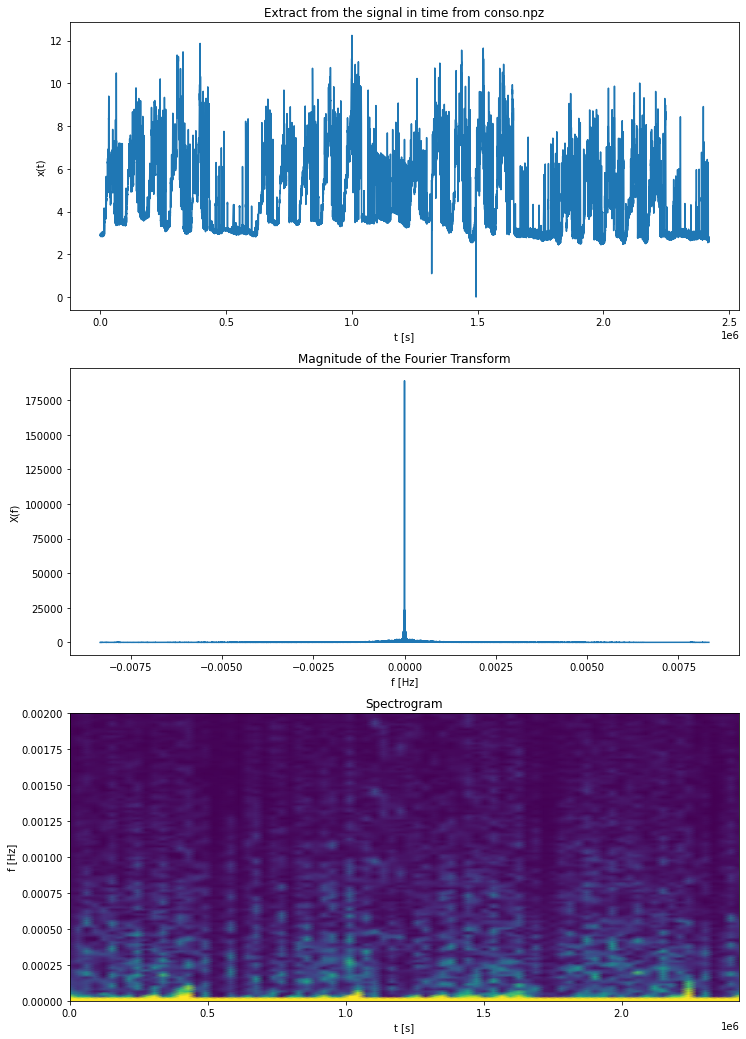

In [71]:
data = np.load("conso.npz")
fs = data['fs']
x = data['x']

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs

fspec,tspec,z = sp.signal.stft(x, fs, nperseg=1024)
z.astype(int)


pl.figure(figsize=[12, 18])
pl.subplot(3,1,1)
pl.title('Extract from the signal in time from conso.npz')
pl.plot(t, x)
pl.xlabel('t [s]')
pl.ylabel('x(t)')
pl.subplot(3,1,2)
pl.title('Magnitude of the Fourier Transform')
pl.plot(f, np.abs(y))
pl.xlabel('f [Hz]')
pl.ylabel('X(f)')
pl.subplot(3,1,3)
pl.title('Spectrogram')
vmax = np.quantile(np.real(z.reshape(-1)), .998)
pl.pcolormesh(tspec, fspec, np.abs(z), shading='gouraud', vmax=vmax)
pl.ylim([0,0.002])
pl.xlabel('t [s]')
pl.ylabel('f [Hz]')
pl.show()

We can observe the consommation per day (represented by the little bumps) and the conso per week (the empty columns represent week ends). We can notice here that the consommation is higher on fridays, that may be due to classes or evenements that only occur on fridays.

/home/soubi/.conda/envs/map572/lib/python3.7/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


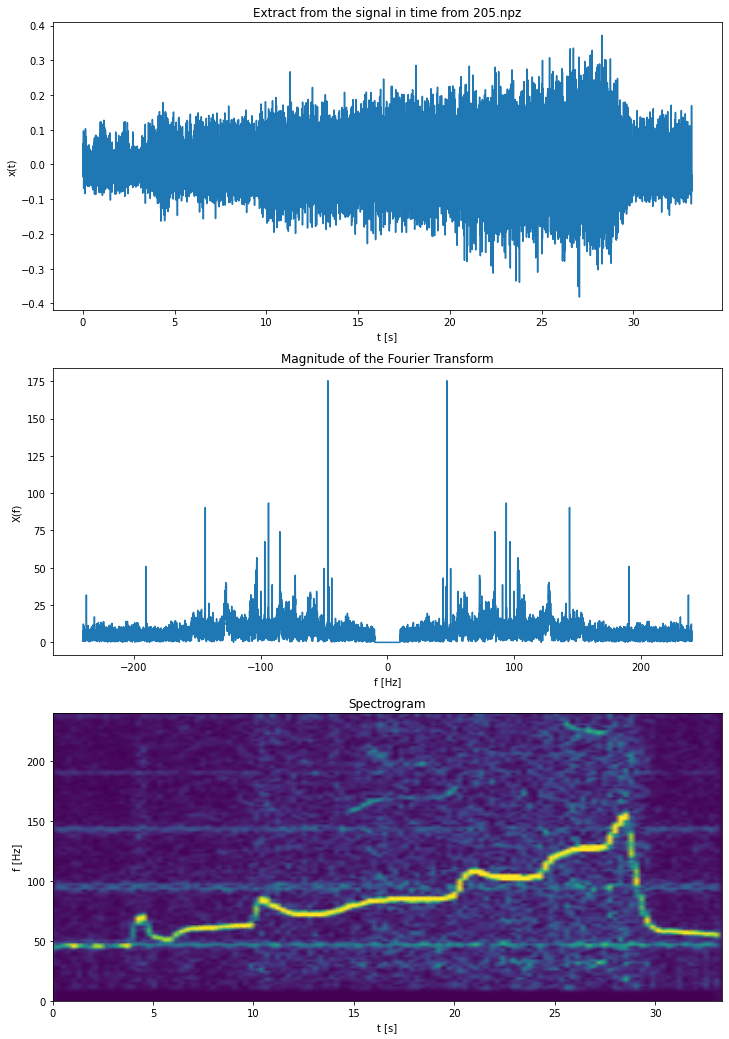

In [70]:
data = np.load("205.npz")
fs = data['fs']
x = data['x']

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs

fspec,tspec,z = sp.signal.stft(x, fs, nperseg=256)
z.astype(int)


pl.figure(figsize=[12, 18])
pl.subplot(3,1,1)
pl.title('Extract from the signal in time from 205.npz')
pl.plot(t[:-1], x)
pl.xlabel('t [s]')
pl.ylabel('x(t)')
pl.subplot(3,1,2)
pl.title('Magnitude of the Fourier Transform')
pl.plot(f, np.abs(y))
pl.xlabel('f [Hz]')
pl.ylabel('X(f)')
pl.subplot(3,1,3)
pl.title('Spectrogram')
vmax = np.quantile(np.real(z.reshape(-1)), .998)
pl.pcolormesh(tspec, fspec, np.abs(z), shading='gouraud', vmax=vmax)
pl.xlabel('t [s]')
pl.ylabel('f [Hz]')
pl.show()

The horizontal lines describe a constant sound at 50Hz and its harmonics. The yellow line represents the number of rotations of the motor per minute. The little bumps may be due to a changing of gears, and the sudden drop indicates that the driver braked.

### 1.2 - Denoising with STFT

/home/soubi/.conda/envs/map572/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


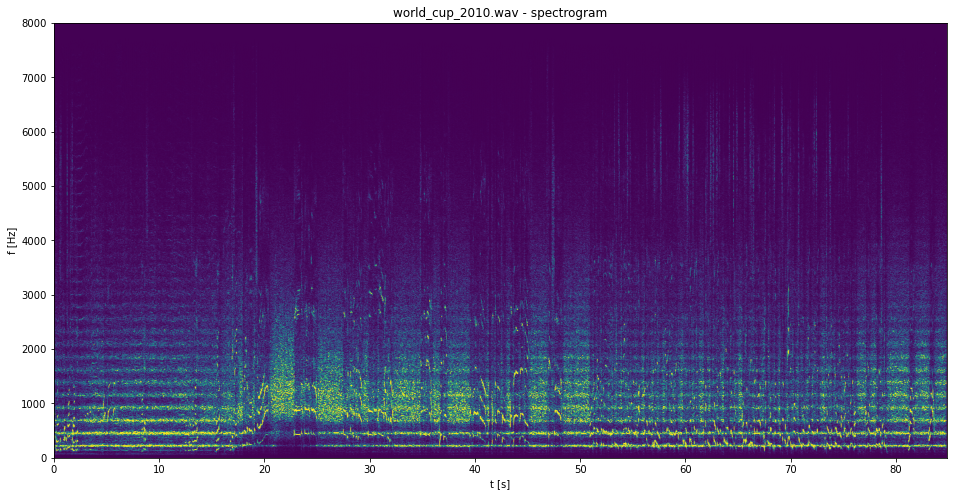

In [35]:
fs,x = sp.io.wavfile.read('world_cup_2010.wav')

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs

fspec,tspec,z = sp.signal.stft(x, fs, nperseg=2048)
z.astype(int)


pl.figure(figsize=[16, 8])
pl.title('world_cup_2010.wav - spectrogram')
vmax = np.quantile(np.real(z.reshape(-1)), .998)
pl.pcolormesh(tspec, fspec, np.abs(z), shading='gouraud', vmax=vmax)
pl.ylim([0,8000])
pl.xlabel('t [s]')
pl.ylabel('f [Hz]')
pl.show()

The horizontal lines are caused by the vuvuzuela. They stop between 20 and 25s. The interventions of the anchorman cause a noisier graph, as we can see at 20 or 25s when he shouts.

In [36]:
for wsize in [128, 256, 512, 1024, 2048]:
    
    fspec, tspec, zxx = sp.signal.stft(x, fs, nperseg=wsize)
    
    i0 = np.searchsorted(tspec, 3)
    i1 = np.searchsorted(tspec, 8)
    psd = np.mean(np.abs(zxx[:, i0:i1])**2, axis=1)
    
    amp = np.maximum(0, np.abs(zxx) - np.sqrt(psd.reshape(-1, 1)))
    zxxfilt = amp * np.exp(1j * np.angle(zxx))
    
    xfilt = sp.signal.istft(zxxfilt, fs, nperseg=wsize)[1]
    
    sp.io.wavfile.write(f'WC/world_cup_2010_denoised_{wsize}_samples.wav', fs, xfilt/np.max(xfilt))

When the window size is too small (128 samples for example), there are audio artifacts that make the record difficult and unpleasant to hear. When the window size is too big (2048 samples for example), we can still hear the vuvuzuela. 512 samples seems to be a good compromise.

## 2. Audio unmixing with Non-negative Matrix factorization

/home/soubi/.conda/envs/map572/lib/python3.7/site-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


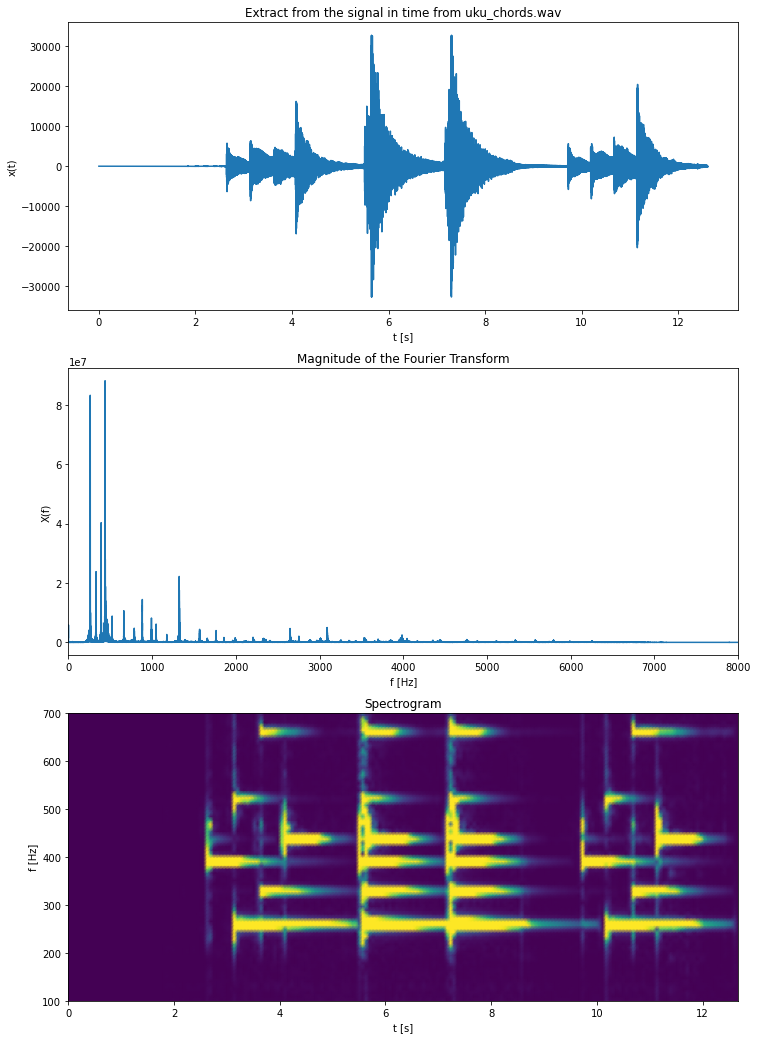

In [33]:
fs,x = sp.io.wavfile.read('uku_chords.wav')

N = len(x)
T = N/fs

t = np.arange(0,T,1/fs)

y = np.fft.fftshift(np.fft.fft(x))
f = np.fft.fftshift(np.fft.fftfreq(N))*fs

fspec,tspec,z = sp.signal.stft(x, fs, nperseg=2048)
z.astype(int)


pl.figure(figsize=[12, 18])
pl.subplot(3,1,1)
pl.title('Extract from the signal in time from uku_chords.wav')
pl.plot(t, x)
pl.xlabel('t [s]')
pl.ylabel('x(t)')
pl.subplot(3,1,2)
pl.title('Magnitude of the Fourier Transform')
pl.plot(f, np.abs(y))
pl.xlabel('f [Hz]')
pl.ylabel('X(f)')
pl.xlim([0,8000])
pl.subplot(3,1,3)
pl.title('Spectrogram')
vmax = np.quantile(np.real(z.reshape(-1)), .998)
pl.pcolormesh(tspec, fspec, np.abs(z), shading='gouraud', vmax=vmax)
pl.ylim([100,700])
pl.xlabel('t [s]')
pl.ylabel('f [Hz]')
pl.show()

The notes played are the open strings of an ukulele : G, C, E and A. They are played together at 5s and 7s. We can observe that some strings keep ringing longer than the others, the thicker one in particular. The small vertical lines are due to the percussive sound of the pick against the strings.

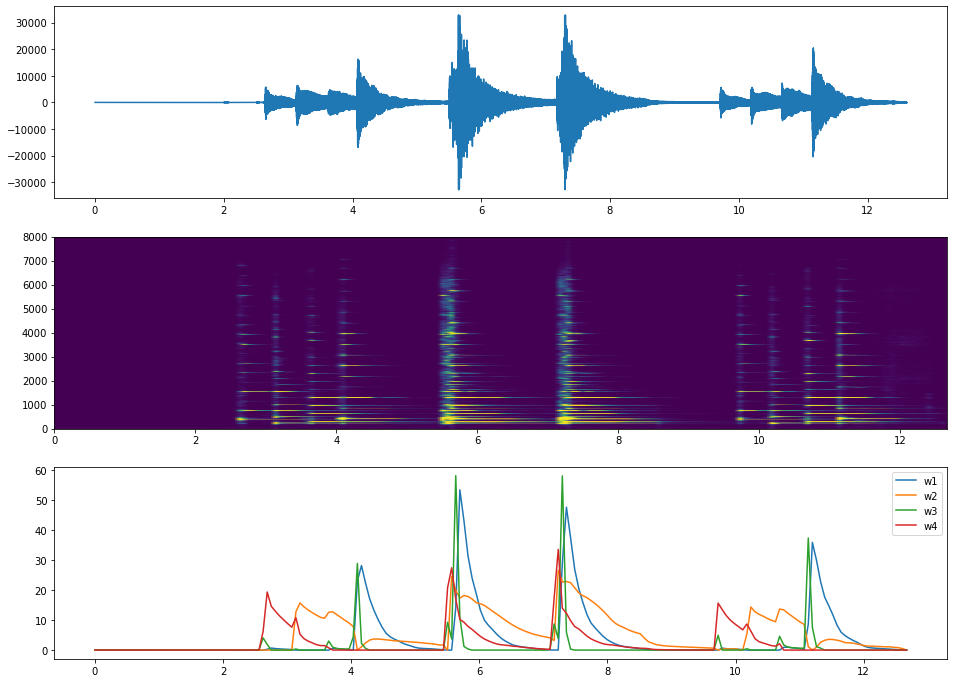

In [23]:
p = 4
nmf = NMF(n_components=p)

fspec, tspec, zxx = sp.signal.stft(x, fs, nperseg=2048)

w = nmf.fit_transform(np.abs(zxx).T).T

pl.figure(figsize=[16,12])
pl.subplot(3,1,1)
pl.plot(t,x)
pl.subplot(3,1,2)
vmax=np.quantile(np.abs(zxx).reshape(-1), .99)
pl.pcolormesh(tspec, fspec, np.abs(zxx), shading='gouraud', vmax=vmax)
pl.subplot(3,1,3)

for i in range(p):
     pl.plot(tspec, w[i], label=f'w{i+1}')
pl.legend()

Each coefficients seems to be sensitive to certain notes, however they are not attributed to one only note, for example w2 seems to react to the second and third note played.

In [34]:
lrzxx = nmf.components_.T.dot(w)

pl.figure(figsize=[16,16])
pl.subplot(2,1,1)
pl.title('Spectogram')
pl.pcolormesh(tspec, fspec, np.abs(zxx), shading='gouraud', vmax=vmax)
pl.subplot(2,1,2)
pl.title('Low-rank spectogram')
pl.pcolormesh(tspec, fspec, np.abs(lrzxx), shading='gouraud', vmax=vmax)

The two spectrograms are really close, but on the low-rank, the lines seem to last longer than in the original spectogram. This makes it look less precise.

In [25]:
p=8

nmf = NMF(n_components=p, max_iter=1000)
fspec, tspec, zxx = sp.signal.stft(x, fs, nperseg=2048)
w = nmf.fit_transform(np.abs(zxx).T).T
s = []

for k in range(p):
    source_spec = (zxx / np.abs(zxx)) * nmf.components_[k, None].T.dot(w[k, None])
    source_x = sp.signal.istft(source_spec, fs=fs)[1]      
    s.append((w[k], source_x))


pl.figure(figsize=[16,18])
pl.subplot(p+1,1,1)
pl.plot(t, x)
for k in range(p):
    pl.subplot(p+1,1,k+2)
    pl.plot(tsources, s[k][0], label=f'Source {k + 1}')
    pl.legend()

After having tried several values of $p$, 8 seems to be sufficient to isolate each note. With the help of the different graphs plotted, we can attribute each source to a note. We then just have to sum the corresponding sources to isolate the different notes.

In [30]:
l = [3,1,3,0,2,1,2,0]
notes = np.zeros((4,len(s[0][1])))

for k in range(8):
    g = l[k]
    notes[g] += s[k][1]
        
for k in range(4):
    x = notes[k]
    sp.io.wavfile.write(f'uku_unmixing/uku_note{k+1}.wav', fs, x/np.max(x))

We can hear that each note has been properly separated from the others. However we sometimes still hear a note very low when another string is being played, this is due to the fact that playing a string usually makes the neighbor strings vibrate a little bit too. Moreover the sound of the strumming of the strings is unhomogenous : in the signals corresponding to the first and fourth note it seems properly reconstructed, but in the second note it is too strong and in the third it is inexistant.